In [1]:
import os
import sys
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import importlib
import seaborn as sns
import umap
import phenograph

sys.path.append('..')
import catrace
import catrace.scale as catscale
import catrace.process_time_trace as ptt
import catrace.exp_collection as ecl
import catrace.cluster as caclust
import dataset_param as dtpar

In [2]:
region = 'Dp'
separate_region = True
if separate_region:
    all_dfovf_select = pd.read_pickle(os.path.join(dtpar.db_dir, 'all_dfovf_select.pkl'))
    all_dfovf_select_rg = all_dfovf_select.xs(region, level='region', axis=1)
    all_dfovf_select_rg.to_pickle(os.path.join(dtpar.db_dir, f'all_dfovf_select_{region}.pkl'))

In [3]:
compute_response = True
if compute_response:
    all_dfovf_select_rg = pd.read_pickle(os.path.join(dtpar.db_dir, f'all_dfovf_select_{region}.pkl'))
    if region =='OB':
        time_window = [5.5,11]
    else:
        time_window = [5,7]   
    frame_rate = 30/4
    all_response = ptt.mean_pattern_in_time_window(all_dfovf_select_rg, time_window, frame_rate)
    all_response.to_pickle(os.path.join(dtpar.db_dir, f'all_response_select_{region}.pkl'))
    all_response

In [4]:
all_response = pd.read_pickle(os.path.join(dtpar.db_dir, 'all_response_select_{}.pkl'.format(region)))
#all_response = pd.read_pickle('../../../results/JH_analysis/all_response_select_{}.pkl'.format(region))
H = catscale.standard_scale(all_response)
data = H.transpose()
fish_id = data.index.get_level_values('fish_id')
training_dict = dict(dtpar.exp_list)
train_cond= fish_id.map(training_dict)
cond_list = dtpar.cond_list
cond_order = {k: v for v, k in enumerate(cond_list)}
cond_idx = train_cond.map(cond_order)

/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [5]:
all_response

fish_id     2021-02-05-DpOBEM-JH9                                          \
cond                      phe-arg                                           
plane                           0                                           
neuron                        1         2         3         4         6     
odor  trial                                                                 
phe   0                  0.000200  0.209071  0.492094  0.474856 -0.013714   
      1                  0.243173 -0.022423  0.559050  0.397474  0.015055   
      2                  0.036004  0.048652  0.147587 -0.068843 -0.078841   
trp   0                 -0.020108  0.409061 -0.034526  0.172329  0.252261   
      1                  0.098764  0.288644  0.048206  0.129740  0.178743   
      2                  0.118979  0.330661 -0.034567 -0.066544  0.074195   
arg   0                  0.043738  0.141261 -0.030435  0.065854  0.461075   
      1                  0.069129  0.117999  0.238499  0.419269  0.127385   
      2                  0.017971  0.179629  0.189134  0.373900 -0.084077   
tdca  0                  0.055465  0.117861  0.071263 -0.057732  0.127823   
      1                  0.021753  0.089649 -0.086117 -0.004822 -0.021328   
      2                  0.075765  0.177125 -0.023670  0.316943  0.012088   
tca   0                  0.029793  0.113502  0.041647  0.120897  0.015454   
      1                  0.061789  0.046316  0.015583  0.064048  0.133865   
      2                  0.094398  0.015964 -0.001715 -0.047148  0.029763   
gca   0                 -0.062147 -0.072202 -0.056622  0.064611  0.056811   
      1                 -0.312422  0.081823  0.070302 -0.062725 -0.037224   
      2                  0.003238  0.111933  0.087542 -0.111042 -0.096473   
acsf  0                  0.129578  0.067252  0.113606  0.020651 -0.075632   
      1                  0.106135 -0.073797  0.018098  0.075378  0.125090   
      2                  0.164553  0.118102  0.104945  0.196501 -0.006301   
spont 0                  0.003318  0.107230  0.016274  0.087140  0.012023   
      1                  0.012960  0.026936 -0.073952 -0.121734 -0.027901   
      2                 -0.039621  0.006412 -0.098490 -0.204592  0.037356   

fish_id                                                        ...  \
cond                                                           ...   
plane                                                          ...   
neuron            7         8         12        17        22   ...   
odor  trial                                                    ...   
phe   0     -0.024605 -0.074521  0.092936 -0.007029 -0.020326  ...   
      1      0.074823 -0.010026  0.089967  0.020651 -0.006347  ...   
      2      0.151725 -0.014862  0.169540  0.140089  0.169556  ...   
trp   0      0.129817 -0.032269  0.094983  0.094825  0.048034  ...   
      1      0.128250  0.042115 -0.102639  0.068903  0.016555  ...   
      2     -0.059373  0.075893  0.065007  0.023148  0.116972  ...   
arg   0      0.033696  0.019058  0.010971  0.049436 -0.005199  ...   
      1      0.316417  0.155094 -0.021431  0.130642 -0.053902  ...   
      2     -0.059250  0.010679 -0.005548  0.056502  0.068987  ...   
tdca  0     -0.077840 -0.020798  0.098266  0.109144  0.045656  ...   
      1     -0.067299  0.038679 -0.030768  0.132517 -0.008783  ...   
      2     -0.078445  0.103355  0.056961 -0.014215  0.160220  ...   
tca   0     -0.133252  0.088258 -0.044862 -0.038487 -0.018844  ...   
      1      0.051403  0.103149  0.100475 -0.043041  0.059922  ...   
      2     -0.042293  0.114024  0.019450  0.101233  0.048663  ...   
gca   0      0.031446  0.085682 -0.075024 -0.078493 -0.037200  ...   
      1     -0.103984 -0.015952 -0.051851  0.009455 -0.064217  ...   
      2     -0.009670  0.017204  0.094498  0.088863 -0.051786  ...   
acsf  0      0.079401  0.060205  0.111486  0.047103 -0.052355  ...   
      1     -0.002489  0.144969  0.066520 -0.048894 -0.017864  ...   
      2      0.0

In [21]:
k=35
communities_raw, graph, Q = phenograph.cluster(data, k=k)
communities_raw = communities_raw + 1 # so that cluster id starts from 1

Finding 35 nearest neighbors using minkowski metric and 'auto' algorithm


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Neighbors computed in 6.695225715637207 seconds
Jaccard graph constructed in 1.6550767421722412 seconds
Wrote graph to binary file in 0.28180956840515137 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.678886
After 3 runs, maximum modularity is Q = 0.681352
After 5 runs, maximum modularity is Q = 0.684018
Louvain completed 25 runs in 12.58187222480774 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 21.693746328353882 seconds


/home/hubo/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


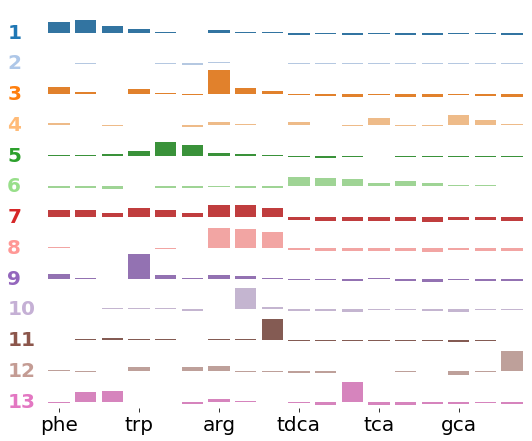

In [22]:
importlib.reload(dtpar)
%matplotlib inline
cluster_cmap = 'tab20'
cluster_mean_df_raw = caclust.get_cluster_mean_df(H, communities_raw)
fig = caclust.plot_cluster_tuning(cluster_mean_df_raw, cmap=cluster_cmap)
fig_dir = dtpar.fig_dir
fig.savefig(os.path.join(fig_dir, f"cluster_mean_{region}.svg"))

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

6_arg-phe vs. 6_phe-trp: t-test independent samples, P_val:8.940e-01 t=-1.364e-01
7_arg-phe vs. 7_phe-trp: t-test independent samples, P_val:9.808e-01 t=-2.463e-02
8_arg-phe vs. 8_phe-trp: t-test independent samples, P_val:2.154e-01 t=1.315e+00
9_arg-phe vs. 9_phe-trp: t-test independent samples, P_val:3.180e-01 t=1.046e+00
10_arg-phe vs. 10_phe-trp: t-test independent samples, P_val:1.430e-01 t=1.578e+00
11_arg-phe vs. 11_phe-trp: t-test independent samples, P_val:9.028e-01 t=-1.250e-01
12_arg-phe vs. 12_phe-trp: t-test independent samples, P_val:2.120e-01 t=-1.325e+00
13_arg-phe vs. 13_phe-trp: t-test independent samples, P_val:1.192e-01 t=1.722e+00
3_phe-trp vs. 3_naive: t-test independent samples, P_val:2.446e-01 t=1.229e+00
4_phe-arg vs. 4_arg-phe: t-test independent samples, P_val:1.284e-01 t=1.603e+00

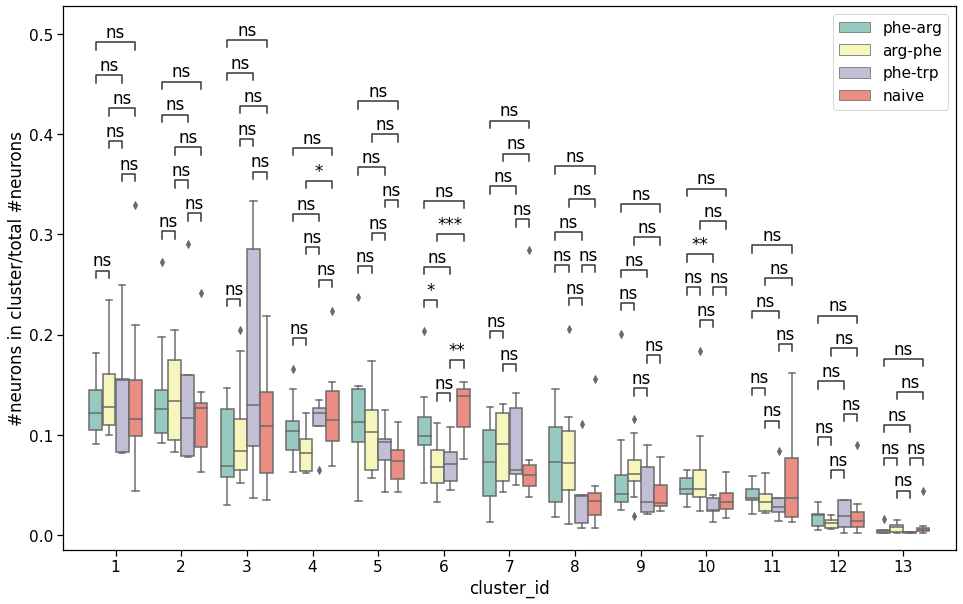

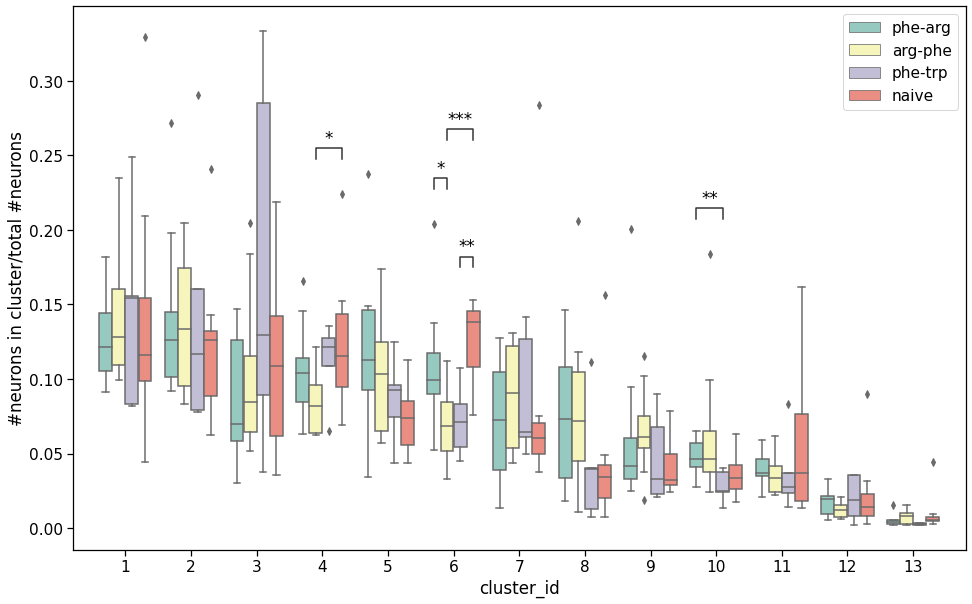

In [23]:
importlib.reload(caclust)
from itertools import combinations
labels = communities_raw


n_clusters = len(np.unique(labels))
cluster_df = pd.DataFrame(labels.reshape(1,-1), columns=all_response.columns)
cluster_df = cluster_df.transpose().rename(columns={0:'cluster_id'}).reset_index()
cluster_df['train_cond']= cluster_df['fish_id'].map(training_dict)
cluster_count_df = cluster_df.groupby('train_cond', sort=False).cluster_id.value_counts(normalize=True).sort_index().reindex(dtpar.cond_list, level='train_cond')
cluster_count_df

cond_pair = list(combinations(dtpar.cond_list, 2))
all_pairs = []

for cluster_id in range(1, n_clusters+1):
    all_pairs.extend([[(cluster_id, x[0]), (cluster_id, x[1])] for x in cond_pair])
    
cluster_df = pd.DataFrame(labels.reshape(1,-1), columns=all_response.columns)
cluster_df = cluster_df.transpose().rename(columns={0:'cluster_id'}).reset_index()
cluster_df['train_cond']= cluster_df['fish_id'].map(training_dict)
cond_list = ['phe-arg', 'arg-phe', 'phe-trp', 'naive']

grouped_cluster_id = cluster_df.groupby(['fish_id','train_cond'], sort=False).cluster_id
cluster_count_df = grouped_cluster_id.value_counts(normalize=True).sort_index().reindex(cond_list, level='train_cond')

cluster_count_df = cluster_count_df.rename('ratio').reset_index()
cluster_count_df

annotator, fig1 = caclust.plot_cluster_cont_with_stat(cluster_count_df, all_pairs, cond_list)

new_pairs = caclust.get_significant_pairs(annotator)
new_pairs

annotator2, fig2 = caclust.plot_cluster_cont_with_stat(cluster_count_df, new_pairs, cond_list)
fig2.savefig(os.path.join(fig_dir, f"cluster_cont_{region}.svg"))

In [23]:
cluster_df.to_pickle(os.path.join(dtpar.db_dir, 'cluster_df_{}.pkl'.format(region)))

In [24]:
cluster_df = pd.read_pickle(os.path.join(dtpar.db_dir, 'cluster_df_{}.pkl'.format(region)))

In [27]:
importlib.reload(dtpar)
from skimage.io import imsave
import catrace.nrn_coord as caroi
importlib.reload(caroi)
%matplotlib inline
data_root_dir = dtpar.data_root_dir
cluster_stack_dir = os.path.join(dtpar.analysis_dir, 'cluster_stack')
save_fig = True
for exp_name, cond in dtpar.exp_list:
    print(exp_name)
    exp_dir = os.path.join(data_root_dir, exp_name, region)
    stack_name = f'{region}_{exp_name}'
    meta_df = cluster_df.loc[cluster_df['fish_id'] == exp_name]
    mstack = caroi.map_meta_to_roi_stack(exp_dir, meta_df, 'cluster_id')
    # np.save(mstack, os.path.join(cluster_stack_dir, 'stacks', '{region}_{expname}.npz'))
    imsave(os.path.join(cluster_stack_dir, 'stacks', f'{stack_name}.tif'), mstack)
    fig = caroi.plot_meta_stack(mstack, cluster_cmap, title=stack_name)
    if save_fig:
        fig.savefig(os.path.join(cluster_stack_dir, 'figures', f'{stack_name}.svg'))
    plt.close()

2021-02-05-DpOBEM-JH9
2021-03-18-DpOBEM-JH10
2021-03-19-DpOBEM-JH10
2021-04-02-DpOBEM-JH11
2021-04-03-DpOBEM-JH11
2021-05-01-DpOBEM-JH13
2021-05-22-DpOBEM-JH14
2021-07-15-DpOBEM-N2
2021-07-16-DpOBEM-N3
2021-07-30-DpOBEM-JH17
2021-07-31-DpOBEM-JH17
2021-09-02-DpOBEM-JH18
2021-09-03-DpOBEM-JH18
2021-09-04-DpOBEM-JH18
2021-09-15-DpOBEM-JH20
2021-09-17-DpOBEM-JH20
2021-09-18-DpOBEM-JH20
2021-09-29-DpOBEM-JH21
2021-10-01-DpOBEM-JH21
2021-10-02-DpOBEM-JH21
2021-11-10-DpOBEM-JH23
2021-11-14-DpOBEM-JH23
2021-11-24-DpOBEM-JH24
2021-11-27-DpOBEM-JH24
2021-11-26-DpOBEM-JH24
2021-12-10-DpOBEM-N4
2021-12-31-DpOBEM-N7
2022-01-23-DpOBEM-N8
2022-01-30-DpOBEM-N9
2022-02-13-DpOBEM-N10
2022-02-20-DpOBEM-N11


In [17]:
from skimage.io import imread
%matplotlib qt5
exp_name = '2021-07-31-DpOBEM-JH17'
stack_name = f'{region}_{exp_name}'
mstack = imread(os.path.join(cluster_stack_dir, 'stacks', f'{stack_name}.tif'))
fig = caroi.plot_meta_stack(mstack, cluster_cmap, title=stack_name)